In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_dir = ""

See the files in data_dir, You have to see two files and one folder: `test.csv`, `images`, `train.csv`

In [8]:
os.listdir(data_dir)

['test.csv', 'images', 'train.csv']

# Features

In [9]:
train = pd.read_csv(data_dir+"/train.csv")
test = pd.read_csv(data_dir+"/test.csv")

In [10]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [11]:
train.shape, test.shape

((990, 194), (594, 193))

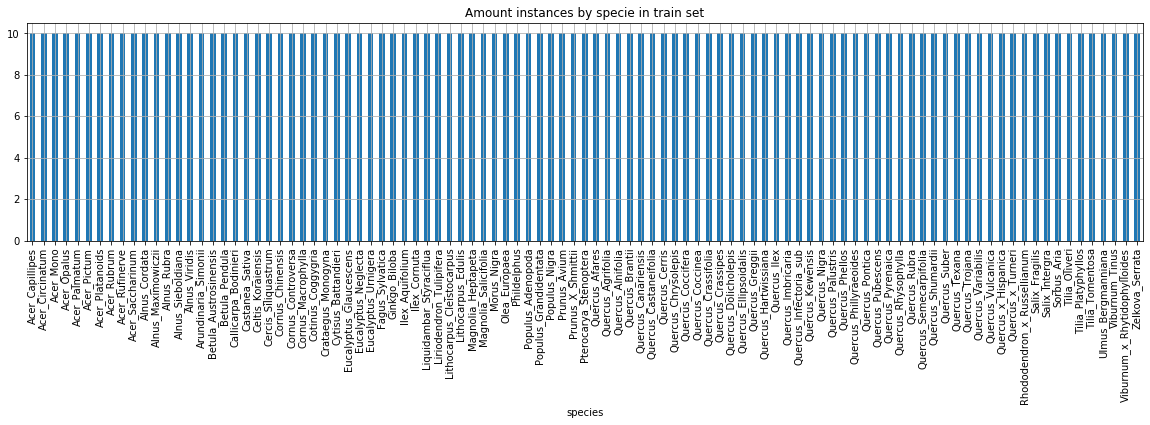

In [12]:
plt.figure()
train.id.groupby(train.species).count().plot.bar(figsize=(20, 4))
plt.title("Amount instances by specie in train set")
plt.grid()

In [13]:
num_classes = train.species.value_counts().shape[0]
print("There are {} classes for the classification task.".format(num_classes))

There are 99 classes for the classification task.


In [14]:
features = [i for i in train.columns if i not in ["species", "id"]]
len(features)

192

In [15]:
species = train.species.value_counts().index.tolist()
species = {species[i]:i for i in range(len(species))}

We can convert the species column to a numeric vector.

In [16]:
put_class = lambda x:species[x]
target = train.species.apply(put_class).values
len(target)

990

In [17]:
fs = features[::3]

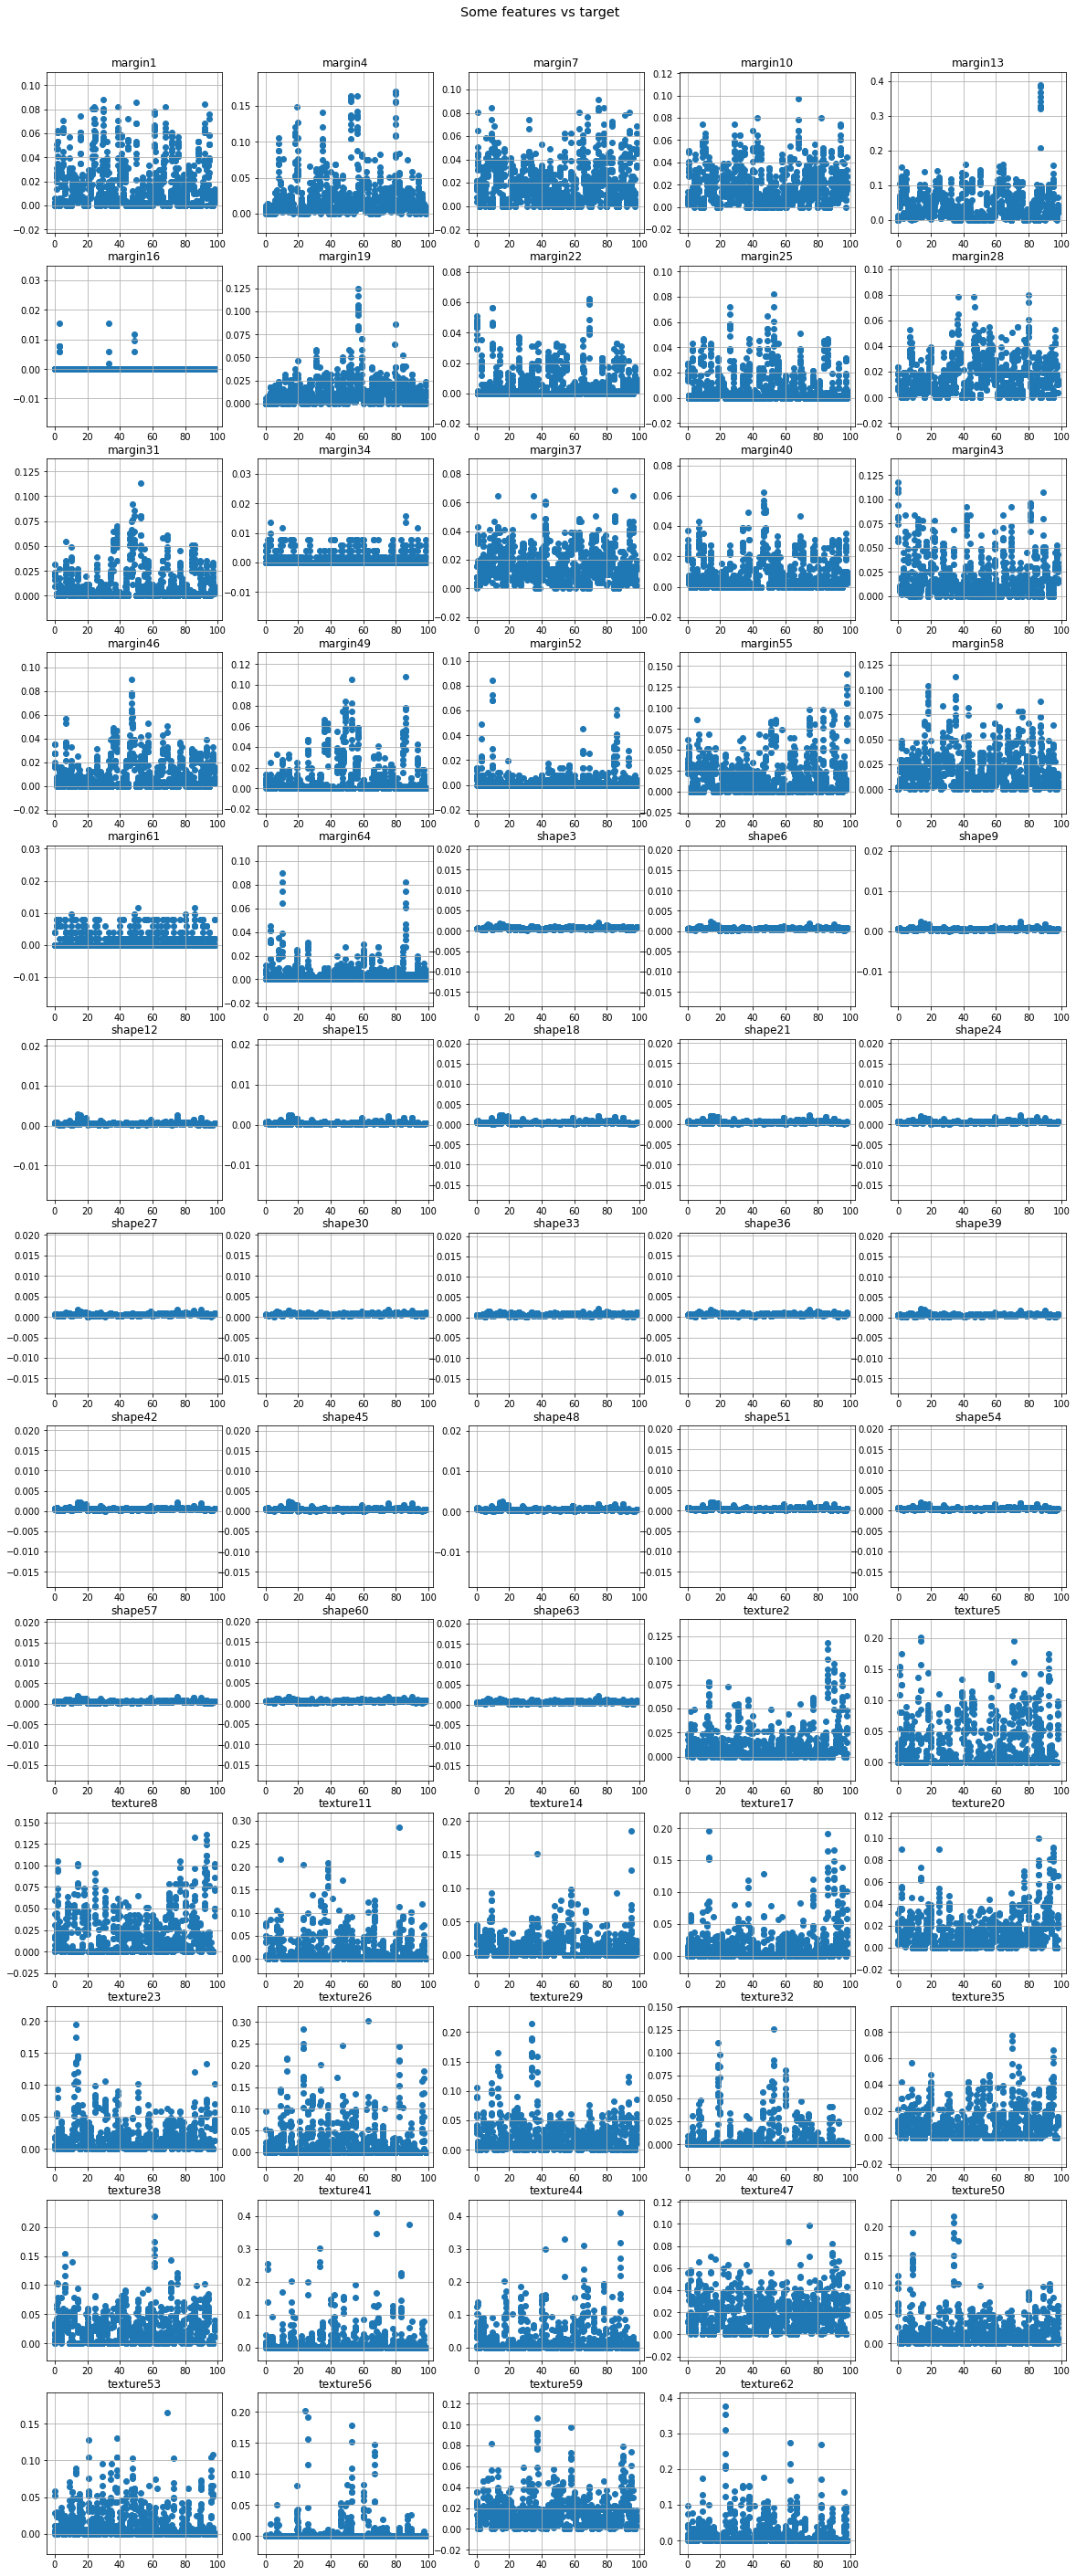

In [18]:
ncols = 5
nrows = int(len(fs)/ncols) + 1
plt.figure(figsize=(20, ncols*10))
st = plt.suptitle("Some features vs target", fontsize="x-large")

for n, feature in enumerate(fs):
    plt.subplot(nrows, ncols, n+1)
    plt.scatter(target, train[feature].values)
    plt.grid()
    plt.title(feature)
st.set_y(0.9)
plt.show()

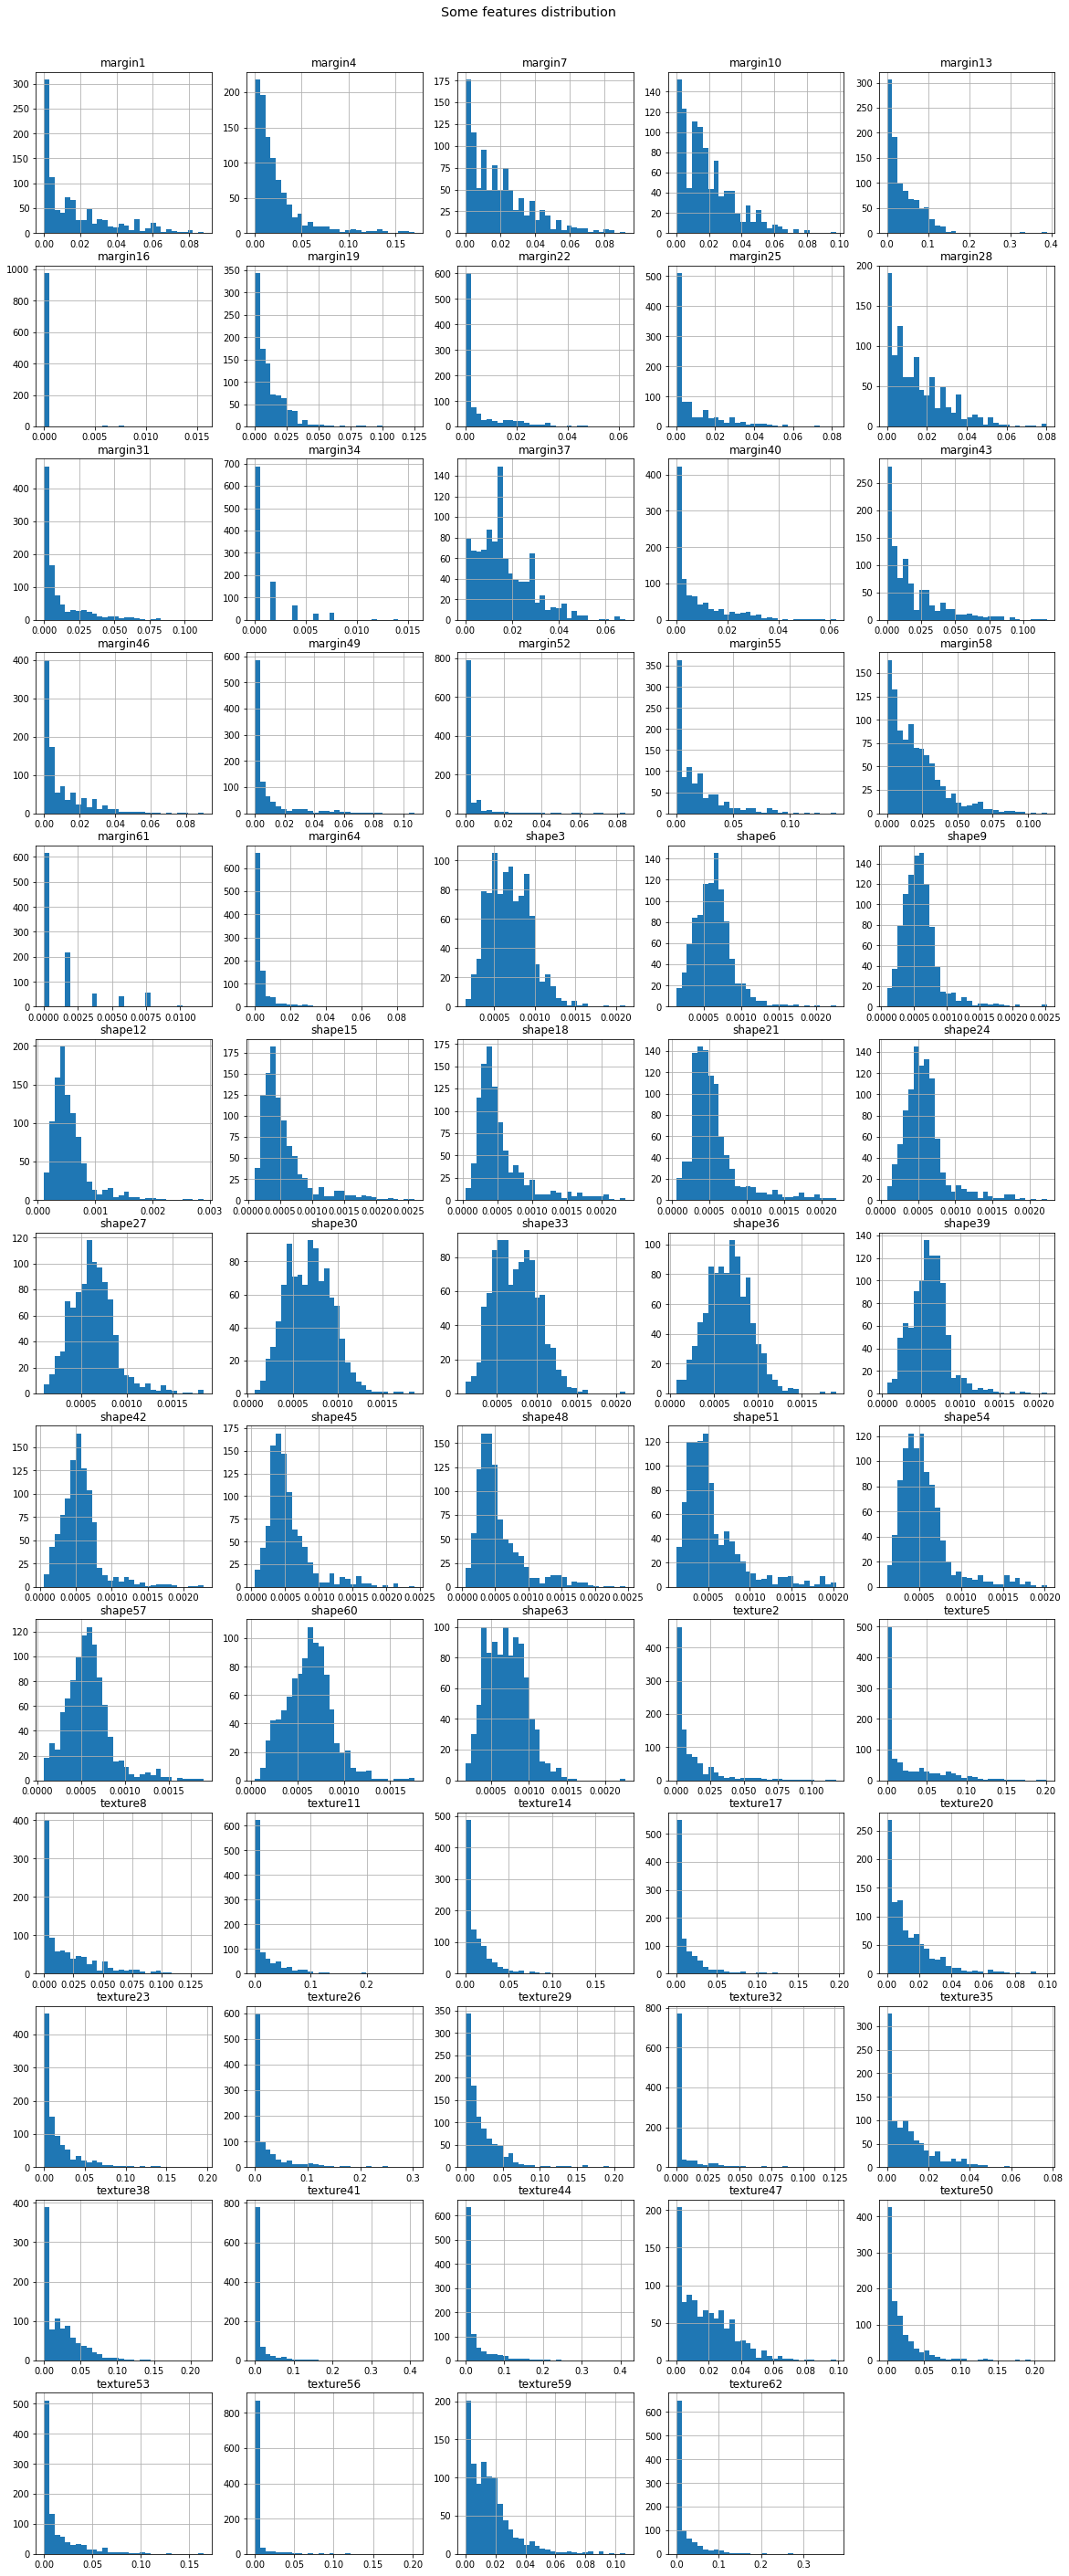

In [19]:
ncols = 5
nrows = int(len(fs)/ncols) + 1
plt.figure(figsize=(20, ncols*10))
st = plt.suptitle("Some features distribution", fontsize="x-large")

for n, feature in enumerate(fs):
    plt.subplot(nrows, ncols, n+1)
    plt.hist(train[feature].values, bins=30)
    plt.grid()
    plt.title(feature)
st.set_y(0.9)
plt.show()

In [21]:
"species" in train.columns

True

In [22]:
"species" in test.columns

False

# Images

In [37]:
from skimage import io

In [38]:
os.listdir(data_dir)

['test.csv', 'images', 'train.csv']

In [39]:
os.listdir(data_dir+"/images")[::60]

['1121.jpg',
 '1215.jpg',
 '1323.jpg',
 '431.jpg',
 '933.jpg',
 '1324.jpg',
 '577.jpg',
 '1230.jpg',
 '1577.jpg',
 '254.jpg',
 '1423.jpg',
 '1298.jpg',
 '625.jpg',
 '2.jpg',
 '1450.jpg',
 '914.jpg',
 '338.jpg',
 '212.jpg',
 '1049.jpg',
 '538.jpg',
 '1309.jpg',
 '314.jpg',
 '78.jpg',
 '1495.jpg',
 '1182.jpg',
 '641.jpg',
 '721.jpg']

In [42]:
train_images = {i:io.imread(data_dir+"/images/"+str(i)+".jpg") for i in train.id.values}

In [55]:
idx = train.id.sample(1).values[0]
idx

741

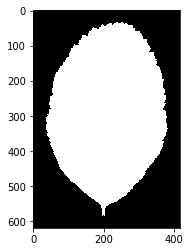

In [62]:
plt.imshow(train_images[idx], cmap="Greys_r")

In [69]:
id_per_specie = train.groupby("species").first().id.values

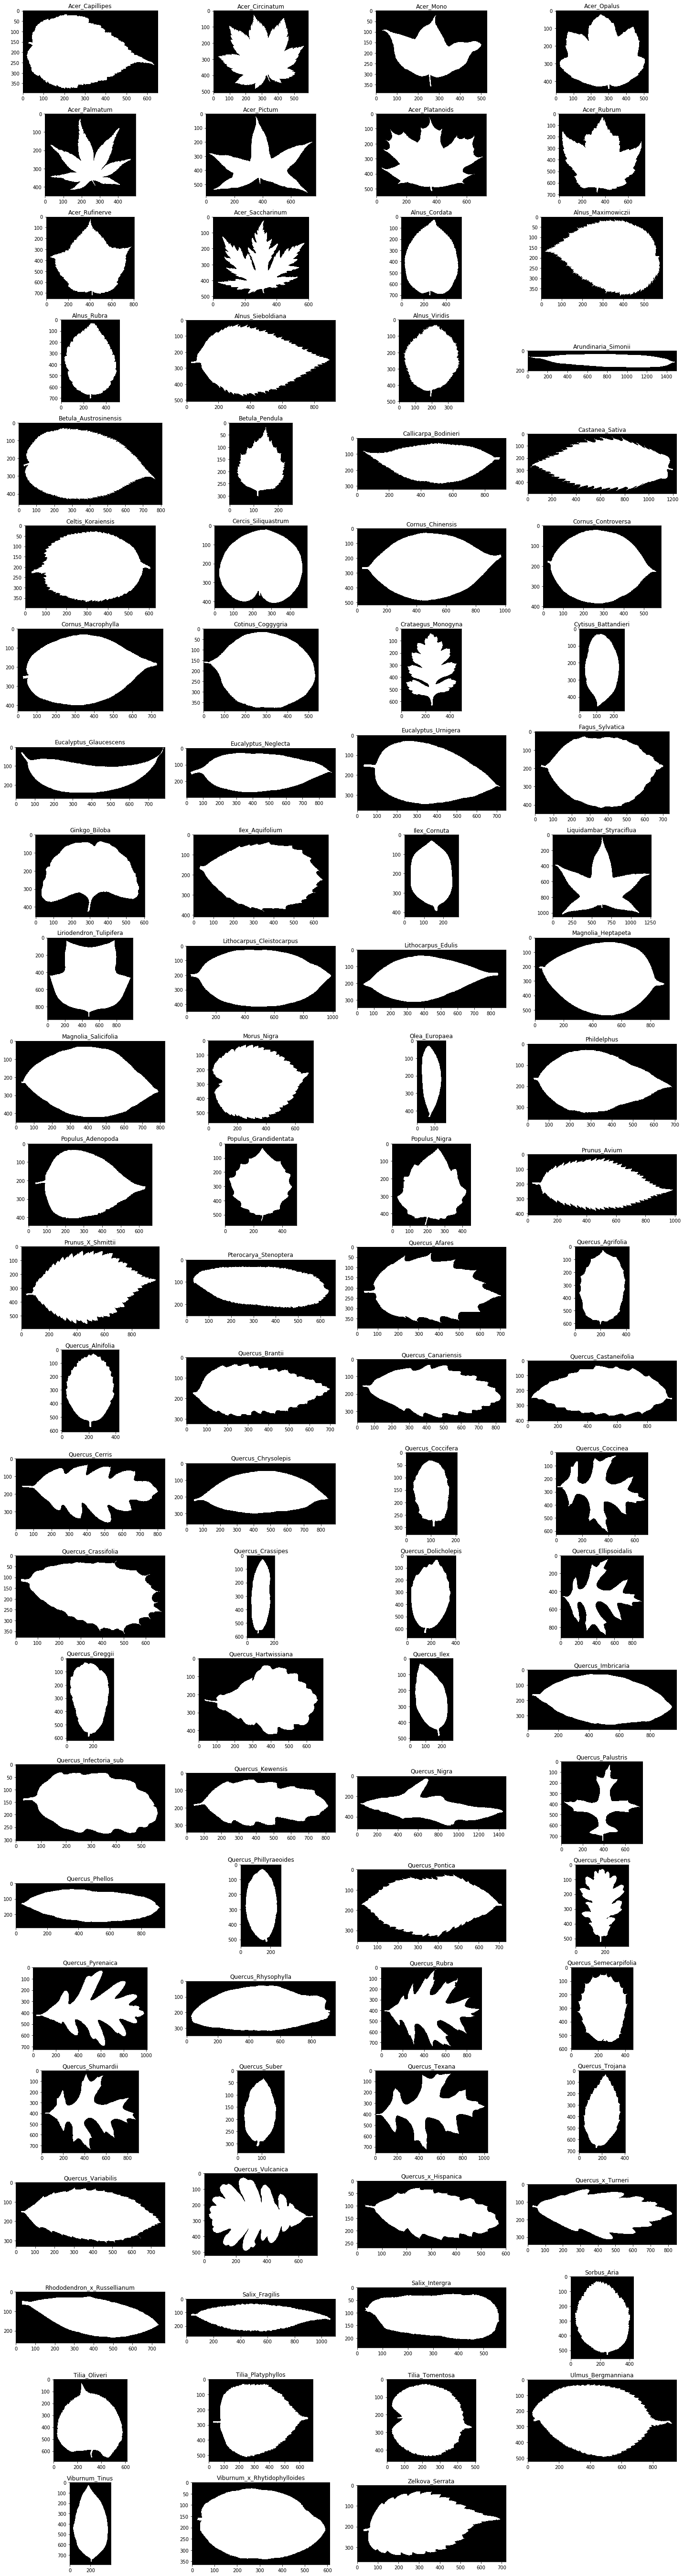

In [88]:
ncols = 4
nrows = int(num_classes/ncols)+1

plt.figure(figsize=(20, nrows*3))

for n, idx in enumerate(id_per_specie):
    plt.subplot(nrows, ncols, n+1)
    plt.imshow(train_images[idx], cmap="Greys_r")
    plt.title(train[train.id==idx].species.values[0])
    plt.tight_layout()
#plt.show()

**Note:** We have to split trainset in train and validation sets to train and validate our models.